In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [2]:
#Importing dataset
df= pd.read_csv(r'G:\Rhishi\singlerow.csv').fillna(0)
df.tail()

,Date,Views
545,27/12/2016,29
546,28/12/2016,40
547,29/12/2016,28
548,30/12/2016,39
549,31/12/2016,75


In [3]:
df.Date=pd.to_datetime(df.Date)
df=df.set_index('Date')
df.head()

,Views
Date,
2015-01-07,291
2015-02-07,64
2015-03-07,26
2015-04-07,20
2015-05-07,28


In [4]:
train,test=df[:-100],df[-100:]

In [5]:
scaler=StandardScaler()
scaler.fit(train)
train=scaler.transform(train)
test=scaler.transform(test)


In [6]:
n_input = 100
n_features = 1

generator=TimeseriesGenerator(train,train,length=n_input,batch_size=20)

model=Sequential()
model.add(LSTM(4,activation='relu',input_shape=(n_input,n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit_generator(generator ,epochs=50)

Epoch 1/50
18/18 [==============================] - 3s 144ms/step - loss: 0.6404
Epoch 2/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5944
Epoch 3/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5954
Epoch 4/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5755
Epoch 5/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5585
Epoch 6/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5605
Epoch 7/50
18/18 [==============================] - 1s 81ms/step - loss: 0.5498
Epoch 8/50
18/18 [==============================] - 2s 110ms/step - loss: 0.5300
Epoch 9/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5309
Epoch 10/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5232
Epoch 11/50
18/18 [==============================] - 2s 108ms/step - loss: 0.5240
Epoch 12/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5142
Epoch 13/50
18/18 [===============

In [15]:
pred_list=[]

batch=train[-n_input:].reshape((1,n_input,n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:], [[pred_list[i]]], axis=1)
    
    

[array([0.2373709], dtype=float32),
 array([0.250729], dtype=float32),
 array([0.2642049], dtype=float32),
 array([0.27756706], dtype=float32),
 array([0.29026595], dtype=float32),
 array([0.3020527], dtype=float32),
 array([0.31300923], dtype=float32),
 array([0.32319003], dtype=float32),
 array([0.33263665], dtype=float32),
 array([0.34138542], dtype=float32),
 array([0.3494714], dtype=float32),
 array([0.35692984], dtype=float32),
 array([0.36379644], dtype=float32),
 array([0.37010744], dtype=float32),
 array([0.375899], dtype=float32),
 array([0.3812067], dtype=float32),
 array([0.38606527], dtype=float32),
 array([0.39050835], dtype=float32),
 array([0.3945677], dtype=float32),
 array([0.39827397], dtype=float32),
 array([0.40165544], dtype=float32),
 array([0.40473896], dtype=float32),
 array([0.40754947], dtype=float32),
 array([0.41010997], dtype=float32),
 array([0.41244206], dtype=float32),
 array([0.4145653], dtype=float32),
 array([0.41649804], dtype=float32),
 array([0.41

In [19]:
batch

array([[[ 0.37004411],
        [ 0.86460855],
        [ 0.66678277],
        [ 0.27113122],
        [-0.12452034],
        [ 0.023849  ],
        [ 0.56786988],
        [ 0.17221833],
        [-0.02560745],
        [ 0.37004411],
        [ 0.07330544],
        [-0.02560745],
        [-0.02560745],
        [ 0.023849  ],
        [ 0.22167477],
        [ 0.46895699],
        [ 0.12276188],
        [-0.12452034],
        [ 0.22167477],
        [ 2.4966712 ],
        [ 0.17221833],
        [ 0.17221833],
        [ 0.22167477],
        [ 0.46895699],
        [ 0.27113122],
        [ 0.41950055],
        [ 0.22167477],
        [ 0.76569566],
        [-0.07506389],
        [ 0.8151521 ],
        [-0.02560745],
        [-0.12452034],
        [ 0.22167477],
        [ 0.37004411],
        [ 0.37004411],
        [ 4.92003697],
        [ 0.41950055],
        [ 0.51841344],
        [ 0.61732633],
        [ 0.51841344],
        [-0.22343322],
        [ 0.56786988],
        [ 0.46895699],
        [-0

In [9]:
df_predict=pd.DataFrame(scaler.inverse_transform(pred_list),index=df[-n_input:].index, columns=["prediction"])

df_test =pd.concat([df,df_predict],axis=1)

In [11]:
df_test.tail()

,Views,prediction
Date,,
2016-12-27,29,29.21303
2016-12-28,40,29.21303
2016-12-29,28,29.21303
2016-12-30,39,29.21303
2016-12-31,75,29.21303


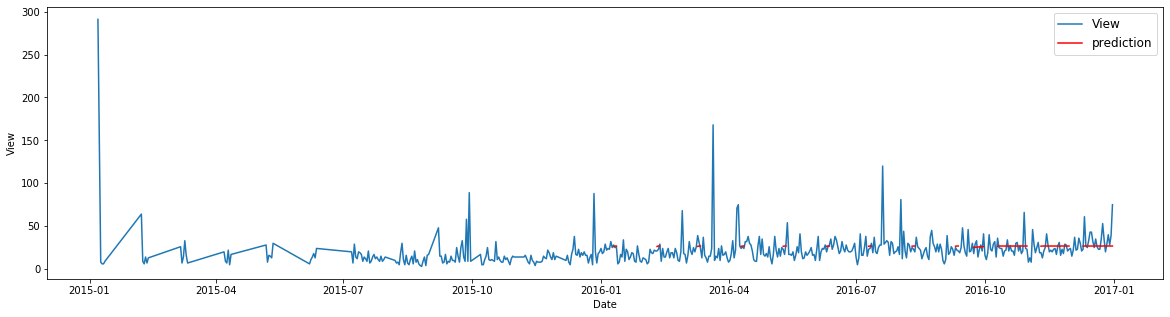

In [12]:
plt.figure(figsize=(20,5))
plt.plot(df_test.index,df_test["Views"],label="View")
plt.plot(df_test.index,df_test["prediction"],color="r",label="prediction")
plt.legend(loc='best',fontsize='large')
plt.xlabel("Date")
plt.ylabel("View")
plt.show()

In [13]:
train=df

scaler.fit(train)
train=scaler.transform(train)

n_input = 100
n_features = 1

generator=TimeseriesGenerator(train,train,length=n_input,batch_size=20)

model=Sequential()
model.add(LSTM(4,activation='relu',input_shape=(n_input,n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit_generator(generator ,epochs=50)


Epoch 1/50
23/23 [==============================] - 2s 106ms/step - loss: 0.5351
Epoch 2/50
23/23 [==============================] - 2s 73ms/step - loss: 0.5316
Epoch 3/50
23/23 [==============================] - 2s 74ms/step - loss: 0.5271
Epoch 4/50
23/23 [==============================] - 2s 77ms/step - loss: 0.5261
Epoch 5/50
23/23 [==============================] - 2s 102ms/step - loss: 0.5234
Epoch 6/50
23/23 [==============================] - 2s 81ms/step - loss: 0.5180
Epoch 7/50
23/23 [==============================] - 2s 99ms/step - loss: 0.5199
Epoch 8/50
23/23 [==============================] - 2s 74ms/step - loss: 0.5118
Epoch 9/50
23/23 [==============================] - 2s 75ms/step - loss: 0.5122
Epoch 10/50
23/23 [==============================] - 2s 74ms/step - loss: 0.5099
Epoch 11/50
23/23 [==============================] - 2s 75ms/step - loss: 0.5238
Epoch 12/50
23/23 [==============================] - 2s 75ms/step - loss: 0.5079
Epoch 13/50
23/23 [================

In [14]:
from pandas.tseries.offsets import DateOffset
add_dates=[df.index[-1]+DateOffset(days=x) for x in range(0,101)]
future_dates=pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [22]:
future_dates.tail(50)

,Views
2017-02-20,NaN
2017-02-21,NaN
2017-02-22,NaN
2017-02-23,NaN
2017-02-24,NaN
2017-02-25,NaN
2017-02-26,NaN
2017-02-27,NaN
2017-02-28,NaN
2017-03-01,NaN


In [24]:
df_predict=pd.DataFrame(scaler.inverse_transform(pred_list),index=future_dates[-n_input:].index, columns=["prediction"])

df_proj =pd.concat([df,df_predict],axis=1)

In [25]:
df_proj.tail(50)

,Views,prediction
2017-02-20,NaN,25.981144
2017-02-21,NaN,25.981436
2017-02-22,NaN,25.981699
2017-02-23,NaN,25.981939
2017-02-24,NaN,25.982157
2017-02-25,NaN,25.982355
2017-02-26,NaN,25.982536
2017-02-27,NaN,25.982698
2017-02-28,NaN,25.982847
2017-03-01,NaN,25.982981


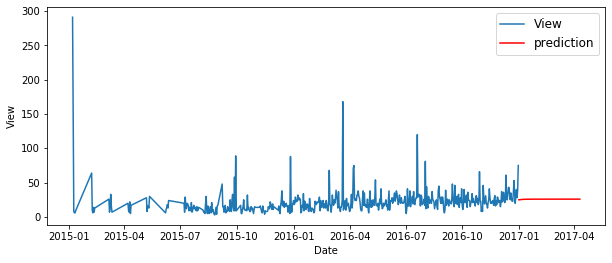

In [33]:
plt.figure(figsize=(10,4))
plt.plot(df_proj.index,df_proj["Views"],label="View")
plt.plot(df_proj.index,df_proj["prediction"],color="r",label="prediction")
plt.legend(loc='best',fontsize='large')
plt.xlabel("Date")
plt.ylabel("View")
plt.show()

In [2]:
from sklearn.preprocessing import StandardScaler